In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import cv2

import math
import panel as pn
from panel.interact import interact, fixed
pn.extension()

In [30]:
def load_video_as_array(input_video_path):
    # load the video and extract frames
    # opening the video is handled by opencv
    vidcap = cv2.VideoCapture(input_video_path)
    
    # number of frames
    ts = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))

    success,tmp = vidcap.read()
    count = 0
    image = []

    while(success):
        frame = cv2.cvtColor(tmp, cv2.COLOR_BGR2GRAY)
        #if count % 10 == 0:
        #print(f'Frame {count}')
        frame = np.array(frame)
        if success:
            image.append(frame)
        else:
            break

        success,tmp = vidcap.read()
        count = count + 1
        #if count % 10 == 0:
        #print(f'Read a new frame: {success}')

    # make a 3d numpy array from list of 2d arrays
    image = np.array(image)    

    # release the file
    vidcap.release()
    cv2.destroyAllWindows()
    
    # rotate the axis
    tmp_rot = np.swapaxes(image,0,2)
    image_rot = np.swapaxes(tmp_rot,0,1)

    return image_rot


def show_image(image, slice_number = 0):
    # this function generates a figure calles fig that shows the right slice
    width = 8
    height = 4
    fig = Figure(figsize=(width, height))
    ax = fig.subplots()
    image_slice = image[:,:,slice_number]
    cmap = ax.imshow(image_slice, cmap='gray')
    fig.colorbar(cmap)
    return pn.Column(f'image min: {image_slice.min()}, max: {image_slice.max()}, median: {np.nanmedian(image_slice)}',fig)


In [40]:
input_video_path = 'raw_data/Aortography/AKS1.avi'

# image is a 3d numpy array with shape = (x pixels, y pixels, number of frames)
image = load_video_as_array(input_video_path)

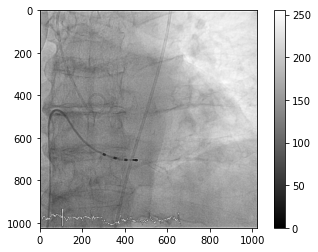

In [38]:
# display one slice (slice 6)
plt.imshow(image[:,:,5],cmap='gray')
plt.colorbar()

Column
    [0] Column
        [0] DiscreteSlider(formatter='%d', name='slice_number', options=[0, 1, 2, 3, 4, ...], value=0)
    [1] Row
        [0] Column
            [0] Markdown(str)
            [1] Matplotlib(Figure)
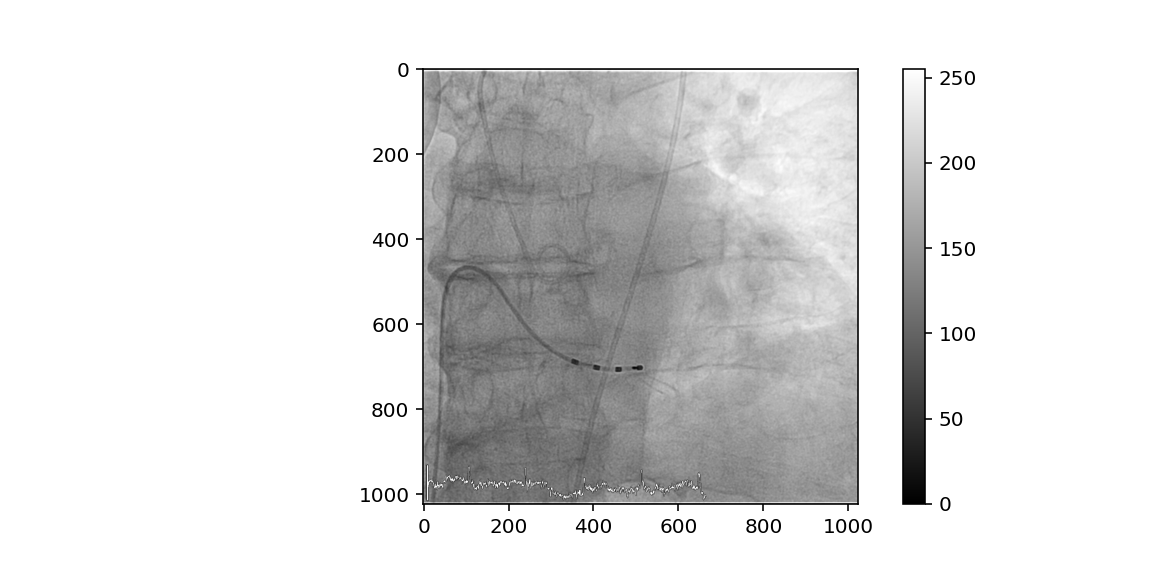

In [39]:
# define slider via interact: interact produces an automatic slider for the argument slice_number
# the parameter image of the function show_image should be fixed, therefore we use image=fixed(image)
max_slice = image.shape[2] - 1
interactive_image = interact(show_image, image=fixed(image), slice_number=range(0, max_slice))
interactive_image